In [34]:
import zipfile
import pandas as pd
import os
import pandas as pd
import datetime
import re
import string
import requests
import csv
import json
import numpy as np
import tweepy
from twython import Twython

## Gather

### Get the Image Data

In [35]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
text = r.iter_lines()

In [36]:
reader = csv.reader(text, delimiter='\t')

In [37]:
with open('image-predictions.tsv', 'wb') as handle:
    for block in r.iter_content(1024):
        handle.write(block)

In [38]:
df_image = pd.read_csv("image-predictions.tsv",'\t')

In [39]:
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### Get the tweets Data

In [40]:
df_tweets = pd.read_csv("twitter-archive-enhanced.csv")

In [41]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [42]:
df_tweets.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1741,679475951516934144,NaN,NaN,2015-12-23 01:37:45 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Evy. She doesn't want to be a Koala. 9/10 https://t.co/VITeF0Kl9L,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679475951516934144/photo/1,9,10,Evy,None,None,None,None
1326,706153300320784384,NaN,NaN,2016-03-05 16:24:01 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Layla. She's giving you a standing ovation.13/10 just magnificent (vid by @CSBrzezinski) https://t.co/KxYXHUHUi2,NaN,NaN,NaN,https://vine.co/v/iXidJXBJ3P9,13,10,Layla,None,None,None,None
406,823719002937630720,NaN,NaN,2017-01-24 02:28:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Balto. He's very content. Legendary tongue slippage. 12/10 would pet forever https://t.co/T7Jr4Gw4sC,7.840579e+17,4.196984e+09,2016-10-06 15:49:14 +0000,"https://vine.co/v/5gKxeUpuKEr,https://vine.co/v/5gKxeUpuKEr",12,10,Balto,None,None,None,None
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None
1341,704847917308362754,NaN,NaN,2016-03-02 01:56:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","""Yes hi could I get a number 4 with no pickles"" ...12/10 https://t.co/kQPVxqA3gq",NaN,NaN,NaN,https://twitter.com/dog_rates/status/704847917308362754/photo/1,12,10,None,None,None,None,None
578,800751577355128832,NaN,NaN,2016-11-21 17:23:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Mauve and Murphy. They're rather h*ckin filthy. Preferred nap over bath. Both 12/10 https://t.co/4UwCTW3lXG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/800751577355128832/photo/1,https://twitter.com/dog_rates/status/800751577355128832/photo/1,https://twitter.com/dog_rates/status/800751577355128832/photo/1",12,10,Mauve,None,None,None,None
2304,666983947667116034,NaN,NaN,2015-11-18 14:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a curly Ticonderoga named Pepe. No feet. Loves to jet ski. 11/10 would hug until forever https://t.co/cyDfaK8NBc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666983947667116034/photo/1,11,10,a,None,None,None,None
1100,735648611367784448,NaN,NaN,2016-05-26 01:47:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",*faints* 12/10 perfection in pupper form https://t.co/t6TxTwTLEK,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735648611367784448/photo/1,12,10,None,None,None,pupper,None
1299,707738799544082433,NaN,NaN,2016-03-10 01:24:13 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",He's doing his best. 12/10 very impressive that he got his license in the first place https://t.co/2vRmkkOLcN,NaN,NaN,NaN,https://vine.co/v/hUvHKYrdb1d,12,10,None,None,None,None,None
454,818536468981415936,NaN,NaN,2017-01-09 19:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Tom. He's a silly dog. Known for his unconventional swing style. One h*ck of a sneaky tongue slip too. 11/10 would push https://t.co/6fSVcn9HAU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/818536468981415936/photo/1,11,10,Tom,None,None,None,None


## Get the Tweet JSON data

Get all the ID's from tweets and get the corresponding texts. Write them in tweet_json.text. I have commented out this part of the code, since consumer_keys and consumer_secret are not being submitted, so this part of the code cannot be run and is only shown for documentation purposes.

In [43]:
#consumer_key = ''
#consumer_secret = ''
#access_token = ''
#access_secret = ''

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth)

In [44]:
#data=[]
#ntweets = 1
#f = open('tweet_json.txt', 'w')
#for id_of_tweet in df_tweets['tweet_id']:
##for id_of_tweet in df_tweets.ix[0:10,'tweet_id']:
#    print(ntweets)
#    ntweets = ntweets + 1
#    try : 
#        tweet = api.get_status(id_of_tweet,tweet_mode='extended',wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#    except : 
#            print("************ No status found for ID : ",id_of_tweet)
##    try :
##        f.write(tweet.full_text+'\n')
##    except :    
##    tweet = twitter.show_status(id=id_of_tweet)
##       print("Unicode Error ",tweet.full_text)
#    data.append(tweet._json)
    
#json.dump(data,f,sort_keys = True,indent = 4)

#f.close()

## Assess 

### Assess the json data

In [45]:
df_json = pd.read_json("tweet_json.txt")

In [46]:
df_json.columns 

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [47]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2356 non-null datetime64[ns]
display_text_range               2356 non-null object
entities                         2356 non-null object
extended_entities                2079 non-null object
favorite_count                   2356 non-null int64
favorited                        2356 non-null bool
full_text                        2356 non-null object
geo                              0 non-null float64
id                               2356 non-null int64
id_str                           2356 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [48]:
df_json.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1729,NaN,NaN,2015-12-24 03:12:15,"[0, 73]","{'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/eRZRI8OTj7', 'expanded_url': 'https://twitter.com/dog_rates/status/679862121895714818/photo/1', 'id': 679862116216651776, 'id_str': '679862116216651776', 'indices': [50, 73], 'media_url': 'http://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg', 'sizes': {'large': {'h': 1024, 'resize': 'fit', 'w': 768}, 'medium': {'h': 1024, 'resize': 'fit', 'w': 768}, 'small': {'h': 680, 'resize': 'fit', 'w': 510}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/eRZRI8OTj7'}], 'symbols': [], 'urls': [], 'user_mentions': []}","{'media': [{'display_url': 'pic.twitter.com/eRZRI8OTj7', 'expanded_url': 'https://twitter.com/dog_rates/status/679862121895714818/photo/1', 'id': 679862116216651776, 'id_str': '679862116216651776', 'indices': [50, 73], 'media_url': 'http://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg', 'media_url_https': 'https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg', 'sizes': {'large': {'h': 1024, 'resize': 'fit', 'w': 768}, 'medium': {'h': 1024, 'resize': 'fit', 'w': 768}, 'small': {'h': 680, 'resize': 'fit', 'w': 510}, 'thumb': {'h': 150, 'resize': 'crop', 'w': 150}}, 'type': 'photo', 'url': 'https://t.co/eRZRI8OTj7'}]}",2640,False,"""Dammit hooman I'm jus trynna lik the fler"" 11/10 https://t.co/eRZRI8OTj7",NaN,...,0.0,NaN,NaN,NaN,688,False,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",False,"{'contributors_enabled': False, 'created_at': 'Sun Nov 15 21:41:29 +0000 2015', 'default_profile': False, 'default_profile_image': False, 'description': 'Your Only Source for Professional Dog Ratings STORE: @ShopWeRateDogs | IG, FB & SC: WeRateDogs | MOBILE APP: @GoodDogsGame Business: dogratingtwitter@gmail.com', 'entities': {'description': {'urls': []}, 'url': {'urls': [{'display_url': 'weratedogs.com', 'expanded_url': 'http://weratedogs.com', 'indices': [0, 23], 'url': 'https://t.co/N7sNNHAEXS'}]}}, 'favourites_count': 132254, 'follow_request_sent': False, 'followers_count': 6114546, 'following': False, 'friends_count': 103, 'geo_enabled': True, 'has_extended_profile': True, 'id': 4196983835, 'id_str': '4196983835', 'is_translation_enabled': False, 'is_translator': False, 'lang': 'en', 'listed_count': 4043, 'location': '𝓶𝓮𝓻𝓬𝓱 ↴ DM YOUR DOGS', 'name': 'WeRateDogs™', 'notifications': False, 'profile_background_color': '000000', 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png', 'profile_background_tile': False, 'profile_banner_url': 'https://pbs.twimg.com/profile_banners/4196983835/1515037507', 'profile_image_url': 'http://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/948761950363664385/Fpr2Oz35_normal.jpg', 'profile_link_color': 'F5ABB5', 'profile_sidebar_border_color': '000000', 'profile_sidebar_fill_color': '000000', 'profile_text_color': '000000', 'profile_use_background_image': False, 'protected': False, 'screen_name': 'dog_rates', 'statuses_count': 6752, 'time_zone': None, 'translator_type': 'none', 'url': 'https://t.co/N7sNNHAEXS', 'utc_offset': None, 'verified': True}"
685,NaN,NaN,2016-10-17 22:51:57,"[0, 80]","{'hashtags': [], 'media': [{'display_url': 'pic.twitter.com/xosHjFzVXc', 'expanded_url': 'https://twitter.com/dog_rates/status/788150585577050112/photo/1', 'id': 788150566354583552, 'id_str': '788150566354583552', 'indices': [81, 104], 'media_url': 'http://pbs.twimg.com/media/CvASw6kWgAAYs2d.jpg', 'media_url_

In [49]:
df_json.duplicated(subset='id').value_counts() 

False    2345
True     11  
dtype: int64

In [50]:
#The following Id's are duplicated
df_json[df_json.duplicated(subset='id')]['id']

19     888554962724278272
95     874012996292530176
118    870063196459192321
132    867051520902168576
155    862096992088072192
247    845677943972139009
260    843235543001513987
298    837110210464448512
382    827324948884643840
566    802265048156610565
784    775350846108426240
Name: id, dtype: int64

### Assess the tweets Data

In [51]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [52]:
pd.set_option('display.max_colwidth', -1)

In [53]:
# Are there duplicated Twitter id's?
cols = df_tweets.columns
df_tweets.duplicated(subset=cols[0]).value_counts() 

False    2356
dtype: int64

None of the tweet_Ids are duplicated.

### Investigate the ratings and the tweet texts

In [54]:
rating_num=df_tweets['rating_numerator']
rating_denom=df_tweets['rating_denominator']

In [55]:
rating_denom.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

Not all the rating denominators are 10. Some are much above 10 and some are below 10 as well. Look into these further. Lets print the texts.

In [56]:
i=0
for txt in df_tweets['text']:
    n = re.findall("\d+/\d+",txt)
    if ((rating_denom[i]>10) | len(n) > 1):
        print(txt,rating_num[i],rating_denom[i], n)
    i=i+1 

@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s 17 10 ['17/10', '13/10']
@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 960 0 ['960/00', '13/10']
RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 12 10 ['12/10', '11/10']
"Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 12 10 ['12/10', '11/10']
RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… 9 11 ['9/11', '14/10']
RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/… 8 10 ['8/10', '11/10']
This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ 10 1

Found some of the txts have double rating. Visually looked at the texts and found that there are double ratings for various reasons.

a) Sometimes there are two dogs

b) The rating was updated.

c) Some are just unique and one can see that the ratings are wrongly extracted for these. For example : 

    RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/… 9 11 ['9/11', '14/10']

    This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv 1 2 ['1/2', '9/10']
    
d) I looked visually in excel for denominators which are >10, and found from the tweet, that its because there are multiple dogs in the picture. These dogs can only be rated based on their category such as puppers, fluffo and so on. 

### Extract my own ratings

In [57]:
i=0
rating_num = np.int8(rating_num)
rating_denom = np.int8(rating_denom)
for txt in df_tweets['text']:
    ratings = re.findall("[0-9.]+\/\d+", txt)
    #Use the last value as the correct rating
    ratings_correct = ratings[len(ratings)-1]
    nums = np.array(ratings_correct.split("/"))
    #round and then convert to integer
    try:
        nums = np.int8(np.rint(np.float16(nums)))
#        if ((rating_num[i]!=nums[0]) | (rating_denom[i]!=nums[1])):
#            print(i,txt,rating_num[i],rating_denom[i],nums[0],nums[1])
    except:
        print(i,"Problematic", txt,rating_num[i],rating_denom[i],nums[0],nums[1])
    i=i+1
        

890 Problematic RT @dog_rates: This... is a Tyrannosaurus rex. We only rate dogs. Please only send in dogs. Thank you ...10/10 https://t.co/zxw8d5g94P 10 10 ...10 10
988 Problematic What jokester sent in a pic without a dog in it? This is not @rock_rates. This is @dog_rates. Thank you ...10/10 https://t.co/nDPaYHrtNX 10 10 ...10 10
1008 Problematic Again w the sharks guys. This week is about dogs ACTING or DRESSING like sharks. NOT actual sharks. Thank u ...11/10 https://t.co/Ie2mWXWjpr 11 10 ...11 10
1009 Problematic Guys pls stop sending actual sharks. It's too dangerous for me and the people taking the photos. Thank you ...10/10 https://t.co/12lICZN2SP 10 10 ...10 10
1015 Problematic Guys... I said DOGS with "shark qualities" or "costumes." Not actual sharks. This did me a real frighten ...11/10 https://t.co/DX1JUHJVN7 11 10 ...11 10
1017 Problematic This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 https://t.co/9e48aPrBm2

Some of these were still causing problems because there was a "..." preceding the rating.

We could also remove the tweets where it says "We only rate dogs"

Fix the "..." before some of the ratings but have not updated the dataframe yet. Use the "lstrip" command. This is just to get rid of the problematic ratings

In [58]:
i=0

rating_num = np.int8(rating_num)
rating_denom = np.int8(rating_denom)
for txt in df_tweets['text']:
    ratings = re.findall("[0-9.]+\/\d+", txt)
    #Use the last value as the correct rating
    ratings_correct = ratings[len(ratings)-1]
    # Fix the "..." that is present in some of the ratings.
    ratings_correct1 = ratings_correct.lstrip(".")
    nums = np.array(ratings_correct1.split("/"))
    #round and then convert to integer
    try:
        nums = np.int8(np.rint(np.float16(nums)))
        if ((rating_num[i]!=nums[0]) | (rating_denom[i]!=nums[1])):
            #Check to see if this txt has two dogs:
            if ( (txt.find(' and') != -1) | (txt.find('&amp')!= -1) ) :
                print('Has 2 DOGS : ',txt,len(ratings), rating_num[i],rating_denom[i],nums[0],nums[1])
            else:
                print('Has 1 DOG : ',txt,len(ratings), rating_num[i],rating_denom[i],nums[0],nums[1]) 
    except:
        print(ratings_correct1)
        print(i,"Problematic", txt,rating_num[i],rating_denom[i],nums[0],nums[1])
    i=i+1
        

Has 1 DOG :  This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 1 5 10 14 10
Has 1 DOG :  @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s 2 17 10 13 10
Has 1 DOG :  @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho 2 -64 0 13 10
Has 1 DOG :  RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… 1 75 10 10 10
Has 2 DOGS :  RT @dog_rates: "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ 2 12 10 11 10
Has 1 DOG :  This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS 1 75 10 10 10
Has 1 DOG :  This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile

1. When its a single dog, typically its better to take the last rating as those are the updated ratings. Also some have decimal ratings which have been extracted incorrectly. See examples below :

      1. This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 1 5 10 14 10

      2. "@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s" 17 10 13 10

      3. "This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10"


2. Some of the texts have two dogs in them. And hence two ratings. I will take the first one for these as the twitter_enhanced followed that logic as well. See examples below :

    1. "Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD"

    2. "This is Spark. He's nervous. Other dog hasn't moved in a while. Won't come when called. Doesn't fetch well 8/10&amp;1/10 https://t.co/stEodX9Aba"



### Assess the Image data

In [59]:
df_image.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1735,821765923262631936,https://pbs.twimg.com/media/C2d_vnHWEAE9phX.jpg,1,golden_retriever,0.980071,True,Labrador_retriever,0.008758,True,Saluki,0.001806,True
1950,863079547188785154,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,Lakeland_terrier,0.275242,True,Airedale,0.190569,True,teddy,0.102595,False
44,666781792255496192,https://pbs.twimg.com/media/CUDigRXXIAATI_H.jpg,1,Italian_greyhound,0.618316,True,Weimaraner,0.151363,True,vizsla,0.085989,True
239,670435821946826752,https://pbs.twimg.com/media/CU3d0azWUAA38FD.jpg,1,sorrel,0.460370,False,basenji,0.135767,True,Cardigan,0.099174,True
359,672622327801233409,https://pbs.twimg.com/media/CVWicBbUYAIomjC.jpg,1,golden_retriever,0.952773,True,Labrador_retriever,0.010835,True,clumber,0.008786,True
257,670778058496974848,https://pbs.twimg.com/media/CU8VFhuVAAAQW8B.jpg,1,pug,0.776612,True,Brabancon_griffon,0.112032,True,boxer,0.039051,True
1856,841439858740625411,https://pbs.twimg.com/media/C61lFFiWoAAJdiL.jpg,3,military_uniform,0.853684,False,Labrador_retriever,0.048200,True,groenendael,0.015394,True
1943,861383897657036800,https://pbs.twimg.com/media/C_RAFTxUAAAbXjV.jpg,1,Cardigan,0.771008,True,Pembroke,0.137174,True,French_bulldog,0.063309,True
1520,787810552592695296,https://pbs.twimg.com/media/Cu7dg2RXYAIaGXE.jpg,2,pug,0.362835,True,French_bulldog,0.221864,True,English_setter,0.080418,True
1751,824297048279236611,https://pbs.twimg.com/media/C3B9ypNWEAM1bVs.jpg,2,teddy,0.588230,False,jigsaw_puzzle,0.028910,False,doormat,0.022251,False


In [60]:
df_image.duplicated(subset='tweet_id').value_counts() 
# None of the tweet_Ids are duplicated.

False    2075
dtype: int64

In [61]:
temp = df_image[df_image['jpg_url'].str.contains('jpg')==False]['jpg_url']
temp.index

Int64Index([320, 815], dtype='int64')

In [62]:
df_image.iloc[[320,815]]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
320,671789708968640512,https://pbs.twimg.com/tweet_video_thumb/CVKtH-4WIAAmiQ5.png,1,dalmatian,0.114259,True,teddy,0.062275,False,steam_locomotive,0.049700,False
815,692752401762250755,https://pbs.twimg.com/tweet_video_thumb/CZ0mhduWkAICSGe.png,1,Samoyed,0.471276,True,Siberian_husky,0.158850,True,Eskimo_dog,0.138672,True


These are png formats but they are perfectly valid. So nothing to be done here. Both jpg and png are acceptable formats.

### Quality issues in the data: 

A.	twitter_enhanced.csv: 
1.	Large amount of Missing data for some variables such as: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp
2.	Twitter_id is int but we will not be using it. So change it to string. 
3.  Incorrect ratings or data: Examined the tweets and found a number of incorrect ratings.
    1. The decimal ratings are extracted incorrectly.
    2. Some have texts which look like ratings, like, 9/11 or 7/11 and these are not correct. The updated rating should be taken.
    3. Some have pics which are not dogs. These can be identified by "We only rate dogs".


B.	df_json:
4.	 Some variables have all null values and need to be investigated further: geo, contributors and coordinates.
5.	Some variables have lots of missing values:  in_reply_to_screen_name, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id,in_reply_to_user_id_str, quoted_status, quoted_status_id,quoted_status_id_str, retweeted_status
6.	The user column has no valid information and has duplicated texts.
7.	Json has 11 duplicated twitter Id’s.

C.	df_image:

8.	 Inconsistency: In the Image dataframe, some names start with Capital letters, others don't. 

### Tidy Issues : 

A. df_tweets: 
1. Since the dog can have one of the 4 categories, the "doggo", "floofer"..etc columns need to be row values instead, otherwise the information is just redundant.

2. The source column has lot of unuseful text which can be removed and only the useful part retained, i.e. the actual source, such as iphone, vine etc.

B. Many columns are duplicates between df_tweets and the df_json data, and the two dataframes need to be merged and the duplicate columns dropped.

## Clean

### Clean the Tweets data frame

In [63]:
#Make a copy of the tweet
df_tw_cpy = df_tweets.copy()
df_tw_cpy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Define

I want to keep only original tweets. So I wish to drop all retweets. The original tweets have retweeted_status_id as NaN. Make them 0 first and then keep only those tweets.

In [64]:
df_tw_cpy['retweeted_status_id'].fillna(0,inplace=True)

df_tw_cpy = df_tw_cpy[df_tw_cpy['retweeted_status_id']==0]

In [65]:
### Test
df_tw_cpy['retweeted_status_id'].value_counts()

0.0    2175
Name: retweeted_status_id, dtype: int64

### Define
Large amount of Missing or unuseful data for some variables such as: 
in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp

Drop these columns.

In [66]:
# Unuseful information with lots of missing values
dropcols = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id',
            'retweeted_status_timestamp']
df_tw_cpy = df_tw_cpy.drop(dropcols,axis=1)

df_tw_cpy.head(2)

#Test
df_tw_cpy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define
Incorrect ratings extracted from Texts. Fix them here. (See section on Quality Issues)

Then drop the original columns ratings_numerator and ratings_denominator and fill them with the fixed ratings wherever applicable.

In [67]:
i=0
myrating_num=[]
myrating_denom=[]

rating_num = np.int8(rating_num)
rating_denom = np.int8(rating_denom)
for txt in df_tw_cpy['text']:
    #Strip Rating.
    ratings = re.findall("[0-9.]+\/\d+", txt)
    
    #Use the last value as the correct rating in case of single dog
    ratings_correct = ratings[len(ratings)-1]
    
    #Use the first value in the case of double dogs.
    if ( (txt.find(' and') != -1) | (txt.find('&amp')!= -1) ) :
        ratings_correct = ratings[0]
        
    # Fix the "..." that is present in some of the ratings.
    ratings_correct1 = ratings_correct.lstrip(".")
    
    #Get the numerator and denominators
    nums = np.array(ratings_correct1.split("/"))
    
    #Use the original ratings first.
    rnum = rating_num[i]
    dnum = rating_denom[i]
    #Change the rating if the ratings are the not the same
    try: 
        nums = np.int8(np.rint(np.float16(nums))) #round and then convert to integer
        if ((rating_num[i]!=nums[0]) | (rating_denom[i]!=nums[1])):
            rnum=nums[0]
            dnum=nums[1]
    except:
        print(ratings_correct1)
        print(i,"Problematic", txt,rating_num[i],rating_denom[i],nums[0],nums[1])
    
    myrating_num.append(rnum)
    myrating_denom.append(dnum)
    
    i=i+1


In [68]:
df_tw_cpy.drop(['rating_numerator','rating_denominator'],axis=1)

,tweet_id,timestamp,source,text,expanded_urls,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,https://twitter.com/dog_rates/status/891087950875897856/photo/1,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,https://twitter.com/dog_rates/status/890609185150312448/photo/1,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,https://twitter.com/dog_rates/status/890240255349198849/photo/1,Cassie,doggo,None,None,None


In [69]:
df_tw_cpy['rating_numerator'] = myrating_num

df_tw_cpy['rating_denominator'] = myrating_denom

In [70]:
df_tw_cpy.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


### Clean the json data

In [71]:
#Make a copy of the json data to clean
df_json_clean = df_json.copy()

df_json_clean=df_json_clean.dropna(axis=1,how='all')

In [72]:
df_json_clean.columns

Index(['created_at', 'display_text_range', 'entities', 'extended_entities',
       'favorite_count', 'favorited', 'full_text', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [73]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 28 columns):
created_at                       2356 non-null datetime64[ns]
display_text_range               2356 non-null object
entities                         2356 non-null object
extended_entities                2079 non-null object
favorite_count                   2356 non-null int64
favorited                        2356 non-null bool
full_text                        2356 non-null object
id                               2356 non-null int64
id_str                           2356 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2356 non-null bool
lang                             2356 non-null object
place                            1

### Define
Drop all columns with >er than 79 NaN values

In [74]:
df_json_clean.dropna(axis=1,thresh=79,inplace=True)

In [75]:
df_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 19 columns):
created_at                       2356 non-null datetime64[ns]
display_text_range               2356 non-null object
entities                         2356 non-null object
extended_entities                2079 non-null object
favorite_count                   2356 non-null int64
favorited                        2356 non-null bool
full_text                        2356 non-null object
id                               2356 non-null int64
id_str                           2356 non-null int64
is_quote_status                  2356 non-null bool
lang                             2356 non-null object
possibly_sensitive               2218 non-null float64
possibly_sensitive_appealable    2218 non-null float64
retweet_count                    2356 non-null int64
retweeted                        2356 non-null bool
retweeted_status                 170 non-null object
source                        

Use only dates upto Aug 1st 2017 

https://stackoverflow.com/questions/22898824/filtering-pandas-dataframes-on-dates

In [76]:
df_json_clean['created_at']
df_json_clean = df_json_clean[(df_json_clean['created_at']<datetime.date(2017,8,2))]  

### Define 
Drop these columns which give no useful information 

In [77]:
dropcols = ['display_text_range','entities','extended_entities','id_str','possibly_sensitive',
            'possibly_sensitive_appealable','source','user']
df_json_clean = df_json_clean.drop(dropcols, axis=1)

### Define 

Drop all rows which have retweeted status = True

In [78]:
df_json_clean = df_json_clean[(df_json_clean['retweeted']==False)]

In [79]:
df_json_clean['retweeted'].value_counts()

False    2356
Name: retweeted, dtype: int64

### Define

Many columns are duplicate between the Json and the tweets data frame. Keep the columns that are useful and make a smaller subset of json data. 

In [80]:
keepcols = ['id','favorite_count', 'favorited','retweet_count']
df_json_clean = df_json_clean[keepcols]

### Define 

Look for duplicated data and drop them

In [81]:
df_json_clean[df_json_clean.duplicated(keep=False)]

,id,favorite_count,favorited,retweet_count
18,888554962724278272,20049,False,3653
19,888554962724278272,20049,False,3653
94,874012996292530176,34997,False,10729
95,874012996292530176,34997,False,10729
117,870063196459192321,37240,False,8626
118,870063196459192321,37240,False,8626
131,867051520902168576,32923,False,8223
132,867051520902168576,32923,False,8223
154,862096992088072192,76882,False,24550
155,862096992088072192,76882,False,24550


In [82]:
df_json_clean.drop_duplicates(inplace=True)

In [83]:
df_json_clean.duplicated().value_counts()

False    2345
dtype: int64

### Clean the Image Data

In [84]:
df_image_cpy = df_image.copy()

#### Define : Capitalize Names in df_Image

In [85]:
df_image['p1'].head(20).unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher', 'Bernese_mountain_dog',
       'box_turtle', 'chow', 'shopping_cart', 'miniature_poodle',
       'golden_retriever', 'Gordon_setter', 'Walker_hound', 'pug',
       'bloodhound', 'Lhasa', 'English_setter', 'hen', 'desktop_computer',
       'Italian_greyhound'], dtype=object)

In [86]:
df_image_cpy['p1'] = df_image_cpy['p1'].str.capitalize()

In [87]:
df_image_cpy['p1'].head(20).unique()

array(['Welsh_springer_spaniel', 'Redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'Miniature_pinscher', 'Bernese_mountain_dog',
       'Box_turtle', 'Chow', 'Shopping_cart', 'Miniature_poodle',
       'Golden_retriever', 'Gordon_setter', 'Walker_hound', 'Pug',
       'Bloodhound', 'Lhasa', 'English_setter', 'Hen', 'Desktop_computer',
       'Italian_greyhound'], dtype=object)

### Merge the Tweets and Json Files

In [88]:
df_mg = pd.merge(df_tw_cpy,df_json_clean,left_on='tweet_id',right_on='id')

In [89]:
#Drop the 'id' column as it is the same as the 'tweet_id'
df_mg.drop('id',axis=1,inplace=True)

In [90]:
df_mg.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,favorited,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,39027,False,8665
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,33430,False,6364
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,25197,False,4226


### Merge the Image Data as well with the above data set

In [91]:
#Merge the Image Data as well.
df_mg = pd.merge(df_mg,df_image_cpy,on='tweet_id')

#### Define

Convert the twitter ID to string

In [92]:
df_mg['tweet_id'] = df_mg['tweet_id'].astype('str')

In [93]:
df_mg.info()

# Tweet_id is now of type object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 26 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
favorite_count        1994 non-null int64
favorited             1994 non-null bool
retweet_count         1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null objec

### Convert the doggo floofer, etc. categories as row values under the heading Category

In [94]:
df_test = df_mg[['tweet_id','doggo','floofer','pupper','puppo']]

In [95]:
df_test.head(10)

,tweet_id,doggo,floofer,pupper,puppo
0,892420643555336193,None,None,None,None
1,892177421306343426,None,None,None,None
2,891815181378084864,None,None,None,None
3,891689557279858688,None,None,None,None
4,891327558926688256,None,None,None,None
5,891087950875897856,None,None,None,None
6,890971913173991426,None,None,None,None
7,890729181411237888,None,None,None,None
8,890609185150312448,None,None,None,None
9,890240255349198849,doggo,None,None,None


In [96]:
df_test  = pd.melt(df_test, id_vars=["tweet_id"],var_name="Category", value_name="Value")

In [97]:
df_test.sort_values(["tweet_id"]).head(5)

,tweet_id,Category,Value
3987,666020888022790149,floofer,None
5981,666020888022790149,pupper,None
1993,666020888022790149,doggo,None
7975,666020888022790149,puppo,None
1992,666029285002620928,doggo,None


In [98]:
df_test = df_test[df_test['Value']!="None"]

In [99]:
df_test.drop('Value',axis=1,inplace=True)

In [100]:
df_test.head(10).sort_values(["Category"])

,tweet_id,Category
9,890240255349198849,doggo
37,884162670584377345,doggo
81,872967104147763200,doggo
89,871515927908634625,doggo
98,869596645499047938,doggo
137,858843525470990336,doggo
148,855851453814013952,doggo
154,854010172552949760,doggo
185,846514051647705089,doggo
190,845397057150107648,doggo


In [101]:
#Merge again with the df_mg dataframe
df_mg_2 = df_mg.copy()
df_mg_2.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [102]:
df_fin = pd.merge(df_mg_2,df_test,on='tweet_id',how='outer')

In [103]:
df_fin.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'favorite_count',
       'favorited', 'retweet_count', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'Category'],
      dtype='object')

In [104]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2005 entries, 0 to 2004
Data columns (total 23 columns):
tweet_id              2005 non-null object
timestamp             2005 non-null object
source                2005 non-null object
text                  2005 non-null object
expanded_urls         2005 non-null object
rating_numerator      2005 non-null int64
rating_denominator    2005 non-null int64
name                  2005 non-null object
favorite_count        2005 non-null int64
favorited             2005 non-null bool
retweet_count         2005 non-null int64
jpg_url               2005 non-null object
img_num               2005 non-null int64
p1                    2005 non-null object
p1_conf               2005 non-null float64
p1_dog                2005 non-null bool
p2                    2005 non-null object
p2_conf               2005 non-null float64
p2_dog                2005 non-null bool
p3                    2005 non-null object
p3_conf               2005 non-null float6

In [107]:
df_fin.to_csv('twitter_archive_master.csv', sep='\t', encoding='utf-8')

## Visualize

In [108]:
import matplotlib.pyplot as plt


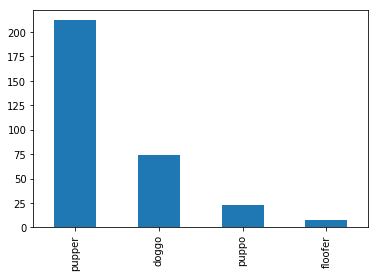

In [109]:
plt.clf()
df_fin['Category'].value_counts().plot(kind='bar')
plt.show()

In [110]:
df_fin['p1'].value_counts().sort_index()

Acorn_squash                      2 
Afghan_hound                      3 
African_crocodile                 1 
African_grey                      1 
African_hunting_dog               1 
Agama                             1 
Airedale                          12
Alp                               1 
American_black_bear               1 
American_staffordshire_terrier    13
Angora                            2 
Appenzeller                       2 
Arabian_camel                     2 
Arctic_fox                        4 
Australian_terrier                2 
Axolotl                           2 
Badger                            2 
Bakery                            1 
Bald_eagle                        1 
Balloon                           3 
Banana                            1 
Bannister                         1 
Barbell                           1 
Barrow                            4 
Basenji                           7 
Basketball                        1 
Basset                            13
B

Not all of these are dog breeds.

In [111]:
df_fin[['p1','text']]

#Issue : The Text is Truncated 
# Fix : pd.set_option('display.max_colwidth', -1)

,p1,text
0,Orange,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU
1,Chihuahua,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"
2,Chihuahua,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB
3,Paper_towel,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ
4,Basset,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f"
5,Chesapeake_bay_retriever,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
6,Appenzeller,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl
7,Pomeranian,When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
8,Irish_terrier,This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b
9,Pembroke,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A


In [112]:
pd.set_option('display.max_colwidth', -1)
df_fin[['p1','text','jpg_url']].head(3)

,p1,text,jpg_url
0,Orange,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
1,Chihuahua,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg
2,Chihuahua,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg


Some of these are not dogs. Checked out the URL's and indeed they are not! :). Lets check their ratings.

In [113]:
df_fin[['p1','text','rating_numerator','rating_denominator']].head(3)

,p1,text,rating_numerator,rating_denominator
0,Orange,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10
1,Chihuahua,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10
2,Chihuahua,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10


Interestingly desktop_computer got a rating of 10/10 while hen (2064) and three-toed_sloth(2060) got low ratings. Lets check their URL's

It looks like the ones which are named as an object yet have a high rating are those which do have a dog in them.
Lets sort the data using rating.

In [114]:
selcols = ['tweet_id', 'rating_numerator', 
                 'rating_denominator', 'name', 'favorite_count', 'favorited', 'retweet_count', 
                 'p1', 'p1_conf', 
                 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'Category']

df_fin.sort_values(['rating_numerator'],ascending=False)[selcols].head(3)

,tweet_id,rating_numerator,rating_denominator,name,favorite_count,favorited,retweet_count,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Category
1314,684222868335505415,121,110,None,4148,False,1533,Soft-coated_wheaten_terrier,0.791182,True,cocker_spaniel,0.072444,True,teddy,0.071486,False,NaN
957,713900603437621249,99,90,None,3020,False,819,Golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True,NaN
1505,675853064436391936,88,80,None,2863,False,1422,Labrador_retriever,0.868367,True,golden_retriever,0.043305,True,vizsla,0.028207,True,NaN


In [115]:
#Lets choose ratings above 20
df_use = df_fin[df_fin['rating_numerator']>20][selcols]

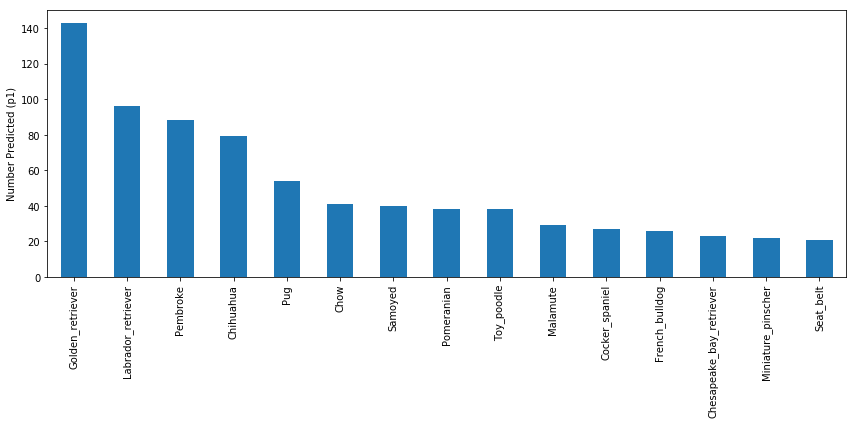

In [141]:
#Which breeds have been posted the most?
plt.clf()

temp = df_fin['p1'].value_counts()
fig = plt.figure(figsize=(12,6))
temp[temp.values>20].plot(kind="bar")
plt.ylabel("Number Predicted (p1)")
plt.tight_layout()
plt.show()
fig.savefig('p1count.png')

In [162]:
"""
Bar chart 
"""
def plotbar(x,y,xlab,ylab) :
    fig = plt.figure(figsize=(12,6))
    opacity = 0.4
    error_config = {'ecolor': '0.3'}
    bar_width = 0.35
    index = np.arange(len(x))
    plt.bar(index, y)
    plt.xlabel(xlab, fontsize=12)
    plt.ylabel(ylab, fontsize=12)
    fig.tight_layout()
    plt.xticks(index, x, fontsize=12, rotation=90)
    plt.tight_layout()
    plt.show()
    return fig
    

In [144]:
def plotscatter(x,y,xlab,ylab) :
    fig = plt.figure(figsize=(10,5))
    plt.scatter(x, y)
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    return fig

In [145]:
#Get the breeds with rating numerator above 10
subdf = df_fin[df_fin.rating_numerator>10][['p1','favorite_count']]
mytemp = subdf['p1'].value_counts()
keepbreeds = np.array(mytemp[mytemp.values>10].index)

In [146]:
keepbreeds

array(['Golden_retriever', 'Pembroke', 'Labrador_retriever', 'Chihuahua',
       'Samoyed', 'Chow', 'Toy_poodle', 'Pomeranian', 'Pug',
       'French_bulldog', 'Cocker_spaniel', 'Malamute', 'Siberian_husky',
       'Eskimo_dog', 'Rottweiler', 'Cardigan', 'Miniature_pinscher',
       'Kuvasz', 'German_shepherd', 'Great_pyrenees',
       'Staffordshire_bullterrier'], dtype=object)

In [147]:
#subdf[subdf['p1'] in keepbreeds] #Does not work
#Keep only breeds with highest ratings
subdf = subdf[subdf.apply(lambda x: x['p1'] in keepbreeds, axis=1)==True]

#Group By breeds and add the favorite counts.
subdf_gp = subdf.groupby(['p1'],as_index=False)['favorite_count'].sum()


In [158]:
subdf_gp = subdf_gp.sort_values(by='favorite_count',ascending=False)

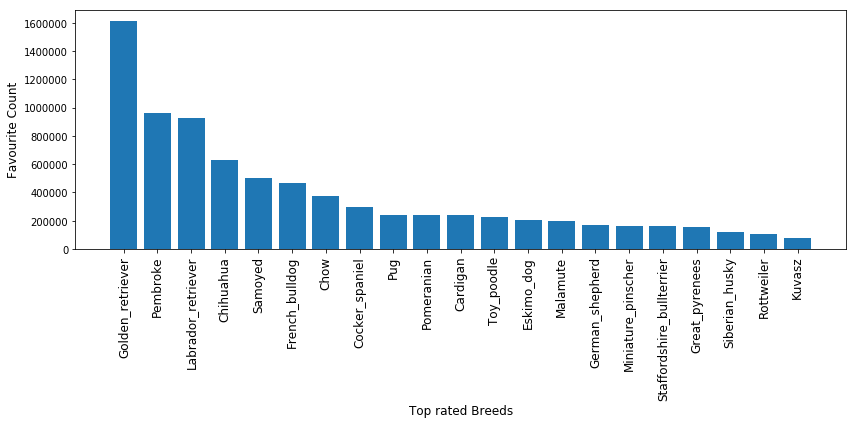

In [163]:
x = subdf_gp['p1']
y= subdf_gp['favorite_count']
_xlab = "Top rated Breeds"
_ylab = "Favourite Count"
f1 = plotbar(x,y,_xlab,_ylab)

In [164]:
f1.savefig('favcount.png')
plt.close(f1)

Golden retriever has the highest favourite count followed by Pembroke and then labrador_retriever.

In [165]:
#List Unique and count
# How many unique breeds have been listed.
len(sorted(df_fin.p1.unique()))

374

In [166]:
# Lets now study the breeds which have been categorized as "doggo", "pupper" et
subdf = df_fin[df_fin.Category.isnull()==False]

In [167]:
subdf_gp = subdf.groupby(['p1'],as_index=False)[['favorite_count','retweet_count']].max()

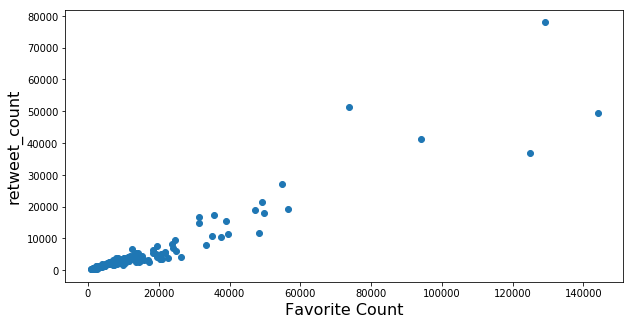

In [168]:
x = subdf_gp['favorite_count']
y= subdf_gp['retweet_count']
_xlab = "Favorite Count"
_ylab = "retweet_count"
f1 = plotscatter(x,y,_xlab,_ylab)
f1

In [169]:
f1.savefig("favretweet.png")
plt.close(f1)

In [129]:
per = subdf.retweet_count/subdf.favorite_count

There is a strong correlation between favorite count indicating that people first favorite and then retweet.

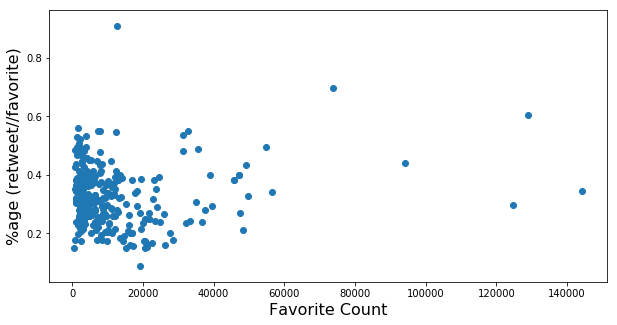

In [130]:
x = subdf['favorite_count']
y= per
_xlab = "Favorite Count"
_ylab = "%age (retweet//favorite)"
plotscatter(x,y,_xlab,_ylab)

In [131]:
from numpy import inf
per[per == inf] = 0
per.mean()
#The mean %age of favourited counts which are retweeted is about 30%

0.322010208316954

In [132]:
subdf['retweet_count'].corr(subdf['favorite_count'])

0.92955752653921464

In [133]:
#What are the favorite counts for the different dog types and which one is the highest.

subdf_gp = subdf.groupby(['Category'],as_index=False)[['favorite_count','retweet_count']].mean()

In [134]:
subdf_gp.head()

,Category,favorite_count,retweet_count
0,doggo,18699.432432,6731.256757
1,floofer,13493.125000,4671.875000
2,pupper,7413.372642,2406.750000
3,puppo,23446.391304,7059.565217


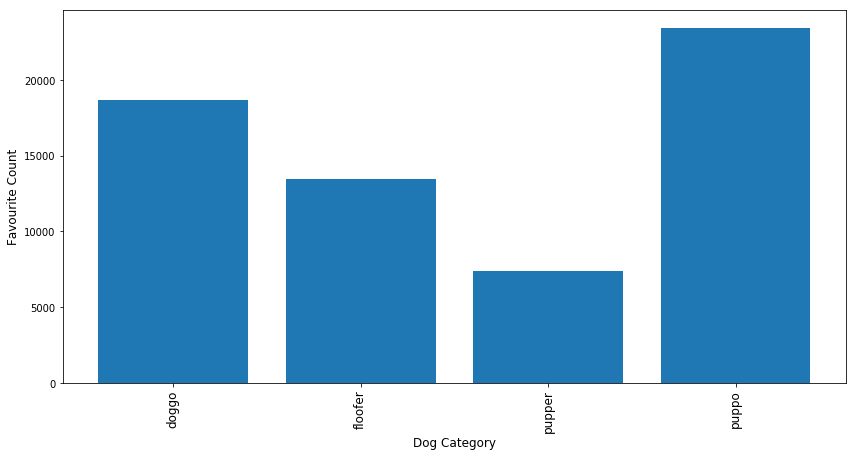

In [135]:
x = subdf_gp['Category']
y= subdf_gp['favorite_count']
_xlab = "Dog Category"
_ylab = "Favourite Count"
plotbar(x,y,_xlab,_ylab)

In [136]:
def plotmult(df,xlab,ylab) :
    
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    x = df[xlab]
    y0 = df[ylab[0]]
    y1 = df[ylab[1]]
    y=[y0,y1]
    ind = np.arange(len(x))
    width = 0.39
    rects1 = ax.bar(ind, y[0], width, color='r')
    rects2 = ax.bar(ind+width, y[1], width, color='y')
    ax.set_ylabel('Counts')
    ax.set_title('')
    ax.set_xticks(ind)
    ax.set_xticklabels(x, fontsize=14, rotation=90)
    f1 = ax.legend( (rects1[0], rects2[0]), ('Favorite Count', 'Retweets') )
    plt.tight_layout()
    return fig


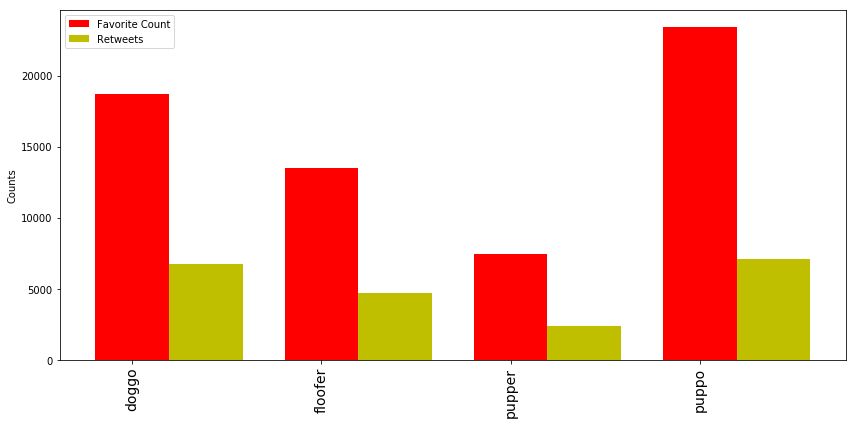

In [137]:
xlab = 'Category'
ylab=['favorite_count','retweet_count']
f1 = plotmult(subdf_gp,xlab,ylab)
f1

In [138]:
f1.savefig('dog_category.png')

From the above one can see that the puppo category has the highest average favorite count, followed by doggo, floofer and pupper.